___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
print(df.info())
print('---------------------------------')
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
---------------------------------
0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


0    7963
1    2037
Name: Exited, dtype: int64

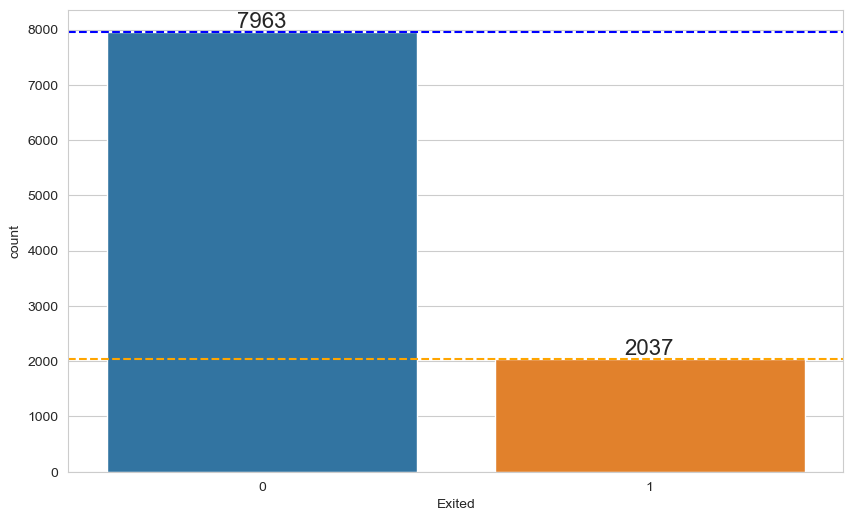

In [6]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

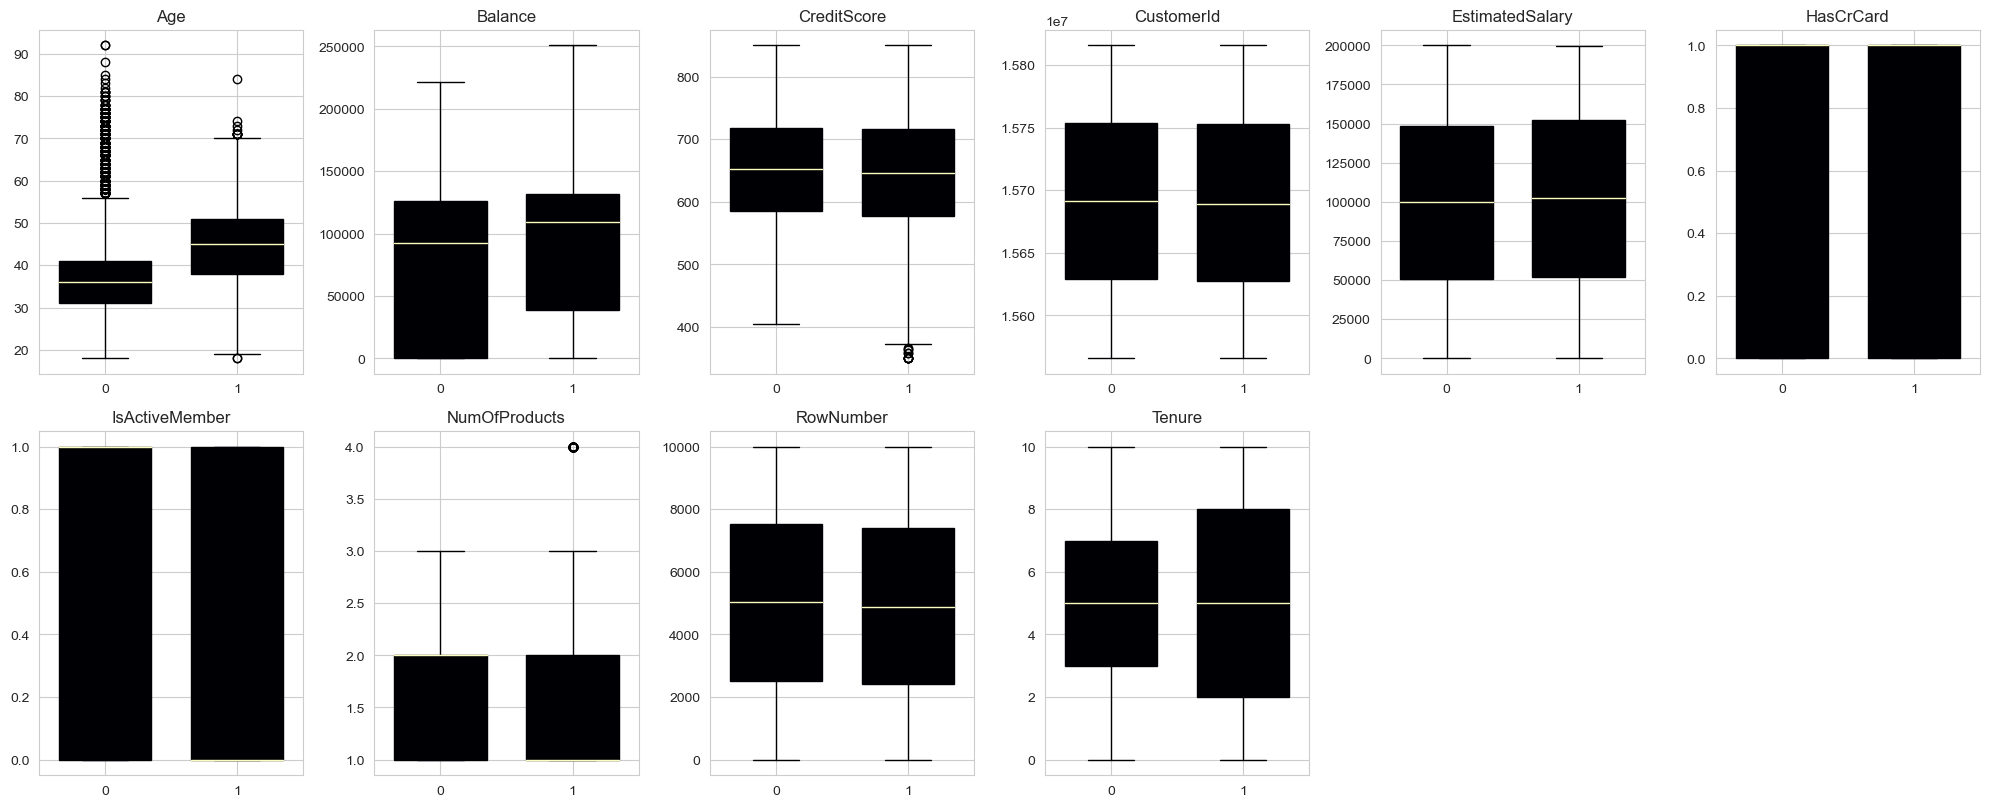

In [7]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();


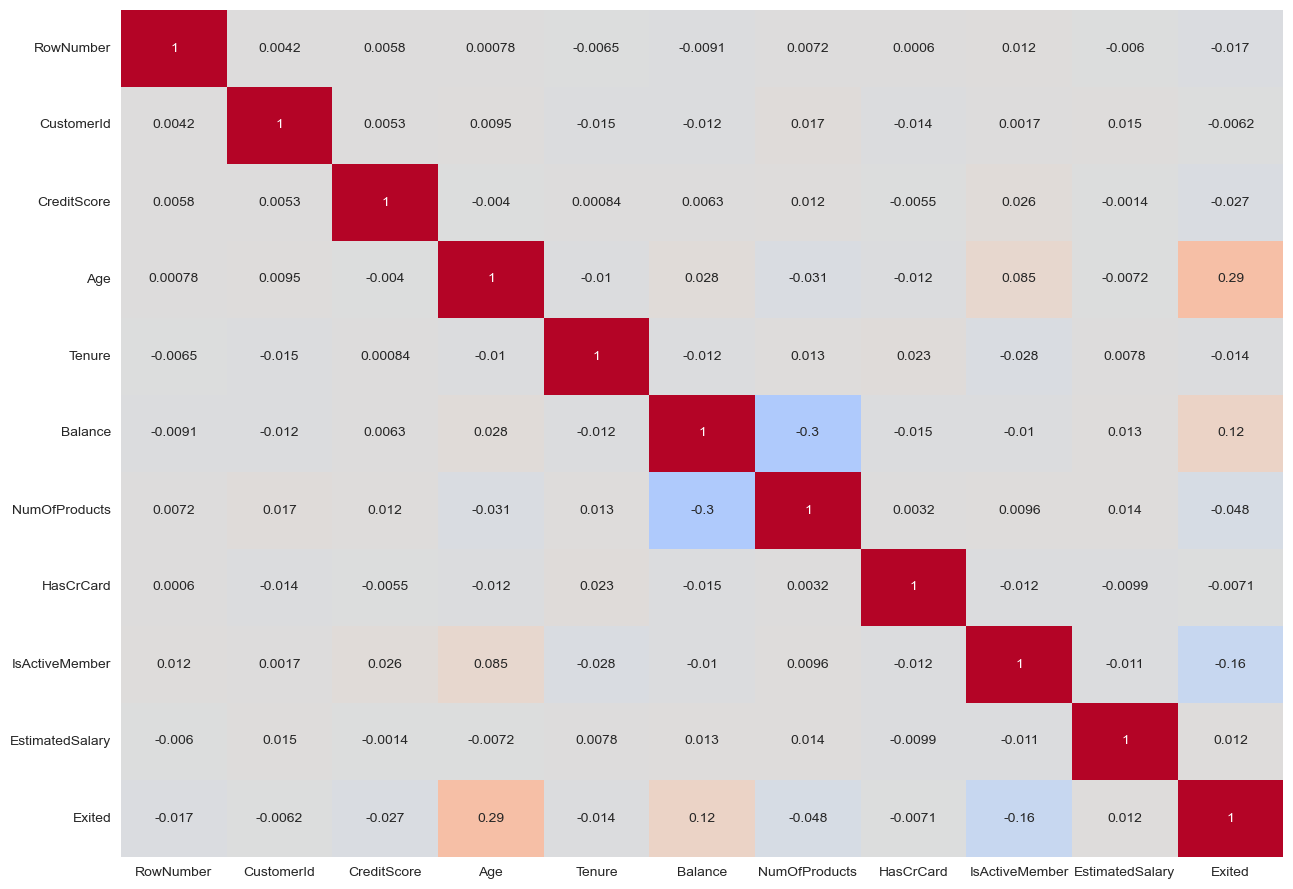

In [8]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [12]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [13]:
object_col = X.select_dtypes('object').columns
encode = LabelEncoder()

for col in object_col:
    X[col] = encode.fit_transform(X[col])

In [14]:
seed = 22

In [15]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)

In [16]:
display(X_train.shape)
display(X_test.shape)

(8100, 10)

(1000, 10)

In [17]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

### Create The Model

In [19]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(11, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                242       
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 5)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=50, 
          epochs=100,
          verbose=1)

Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 0.5675 - accuracy: 0.7742 - val_loss: 0.4971 - val_accuracy: 0.7967
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7963 - val_loss: 0.4821 - val_accuracy: 0.7967
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7963 - val_loss: 0.4677 - val_accuracy: 0.7967
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7963 - val_loss: 0.4578 - val_accuracy: 0.7967
Epoch 5/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7963 - val_loss: 0.4461 - val_accuracy: 0.7967
Epoch 6/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7963 - val_loss: 0.4386 - val_accuracy: 0.7967
Epoch 7/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7963 - val_loss: 0.4329 - val_accuracy: 0.7967

Epoch 58/100
162/162 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8625 - val_loss: 0.3409 - val_accuracy: 0.8700
Epoch 59/100
162/162 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8614 - val_loss: 0.3410 - val_accuracy: 0.8644
Epoch 60/100
162/162 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8622 - val_loss: 0.3448 - val_accuracy: 0.8678
Epoch 61/100
162/162 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8620 - val_loss: 0.3520 - val_accuracy: 0.8667
Epoch 62/100
162/162 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8641 - val_loss: 0.3503 - val_accuracy: 0.8600
Epoch 63/100
162/162 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8636 - val_loss: 0.3428 - val_accuracy: 0.8622
Epoch 64/100
162/162 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8602 - val_loss: 0.3415 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.568,0.774,0.497,0.797
1,0.484,0.796,0.482,0.797
2,0.471,0.796,0.468,0.797
3,0.460,0.796,0.458,0.797
4,0.452,0.796,0.446,0.797


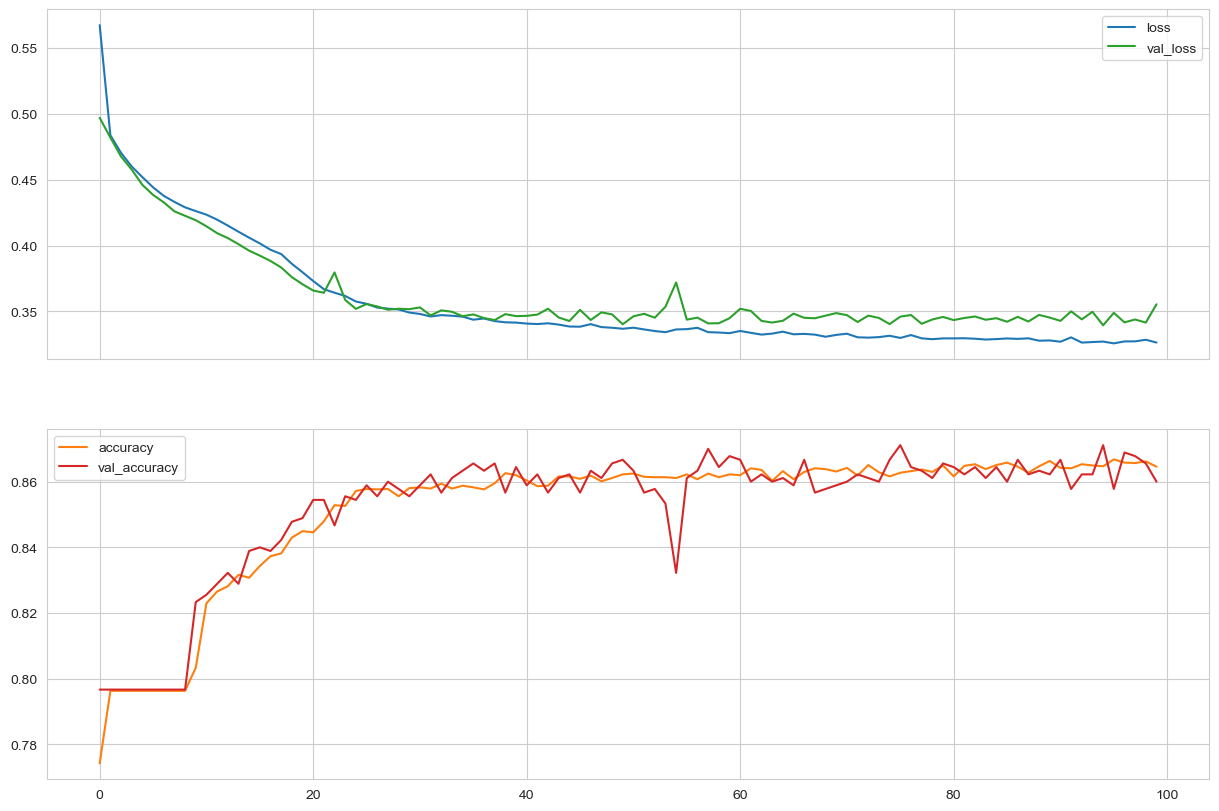

In [22]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [23]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3670898973941803
accuracy :  0.8429999947547913


In [24]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 0 classındaki scorlarımız gayet iyi gelirken 1 için sonuçlar baya kötü. Sebebi olarak yukarda datayı incelerken gördüğümüz 0 ve 1 arasındaki imbalance durum.

32/32 [==============================] - 0s 1ms/step
[[774  22]
 [135  69]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       796
           1       0.76      0.34      0.47       204

    accuracy                           0.84      1000
   macro avg       0.80      0.66      0.69      1000
weighted avg       0.83      0.84      0.82      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [25]:
from sklearn.utils import class_weight

In [26]:
sklearn_weights = class_weight.compute_class_weight(class_weight= 'balanced', classes= np.unique(y_train), y= y_train)
sklearn_weights

array([0.62790698, 2.45454545])

In [27]:
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [28]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(11, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 22)                242       
                                                                 
 dense_5 (Dense)             (None, 11)                253       
                                                                 
 dense_6 (Dense)             (None, 5)                 60        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=50, 
          epochs=100,
          verbose=1,
          class_weight=sklearn_weights)

Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.6633 - val_loss: 0.6430 - val_accuracy: 0.7300
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.7194 - val_loss: 0.6108 - val_accuracy: 0.6889
Epoch 3/100
162/162 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6377 - val_loss: 0.6079 - val_accuracy: 0.6444
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.6532 - val_loss: 0.6195 - val_accuracy: 0.6200
Epoch 5/100
162/162 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.6717 - val_loss: 0.5583 - val_accuracy: 0.7122
Epoch 6/100
162/162 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.6922 - val_loss: 0.5889 - val_accuracy: 0.6789
Epoch 7/100
162/162 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.7079 - val_loss: 0.5428 - val_accuracy: 0.7256

Epoch 58/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.7775 - val_loss: 0.4711 - val_accuracy: 0.7689
Epoch 59/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.7796 - val_loss: 0.4819 - val_accuracy: 0.7700
Epoch 60/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.7815 - val_loss: 0.5486 - val_accuracy: 0.7133
Epoch 61/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7784 - val_loss: 0.5450 - val_accuracy: 0.7078
Epoch 62/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7773 - val_loss: 0.4267 - val_accuracy: 0.8000
Epoch 63/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7804 - val_loss: 0.4866 - val_accuracy: 0.7544
Epoch 64/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7794 - val_loss: 0.4628 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [30]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.687,0.663,0.643,0.730
1,0.668,0.719,0.611,0.689
2,0.632,0.638,0.608,0.644
3,0.611,0.653,0.619,0.620
4,0.596,0.672,0.558,0.712


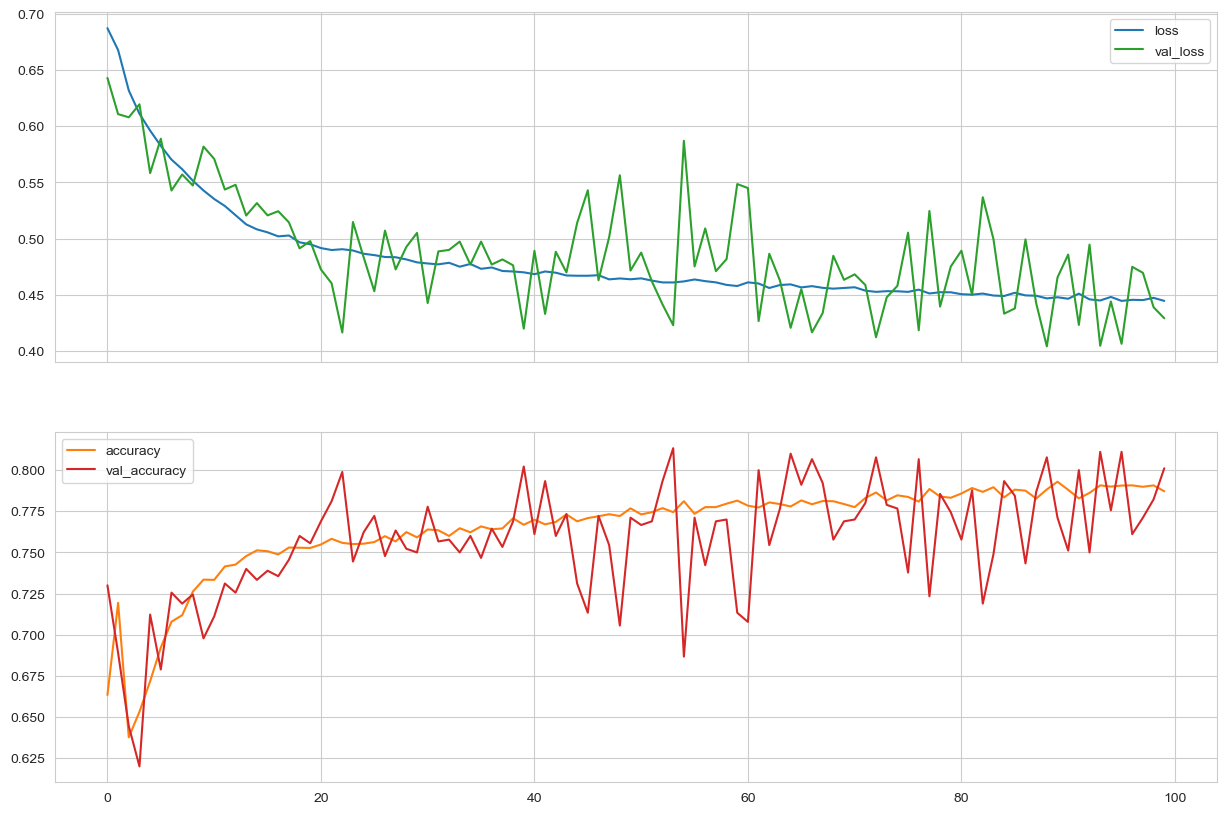

In [31]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [32]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4495643377304077
accuracy :  0.7929999828338623


In [33]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[644 152]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.73      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.83      0.79      0.81      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [34]:
from tensorflow.keras.optimizers import Adam

In [35]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(11, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate=  0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 22)                242       
                                                                 
 dense_9 (Dense)             (None, 11)                253       
                                                                 
 dense_10 (Dense)            (None, 5)                 60        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=50, 
          epochs=100,
          verbose=1,
          class_weight=sklearn_weights)

Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 0.6778 - accuracy: 0.6791 - val_loss: 0.6906 - val_accuracy: 0.5344
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6374 - val_loss: 0.5604 - val_accuracy: 0.7167
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6780 - val_loss: 0.5814 - val_accuracy: 0.6800
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7017 - val_loss: 0.5407 - val_accuracy: 0.7256
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7288 - val_loss: 0.5727 - val_accuracy: 0.7133
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7347 - val_loss: 0.5300 - val_accuracy: 0.7367
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7438 - val_loss: 0.4608 - val_accuracy: 0.7922

Epoch 58/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7948 - val_loss: 0.4594 - val_accuracy: 0.7711
Epoch 59/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4376 - accuracy: 0.7960 - val_loss: 0.4681 - val_accuracy: 0.7656
Epoch 60/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7948 - val_loss: 0.5144 - val_accuracy: 0.7289
Epoch 61/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4420 - accuracy: 0.7936 - val_loss: 0.5779 - val_accuracy: 0.6811
Epoch 62/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7938 - val_loss: 0.4148 - val_accuracy: 0.8089
Epoch 63/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.7972 - val_loss: 0.4575 - val_accuracy: 0.7789
Epoch 64/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7968 - val_loss: 0.4480 - val_accuracy:

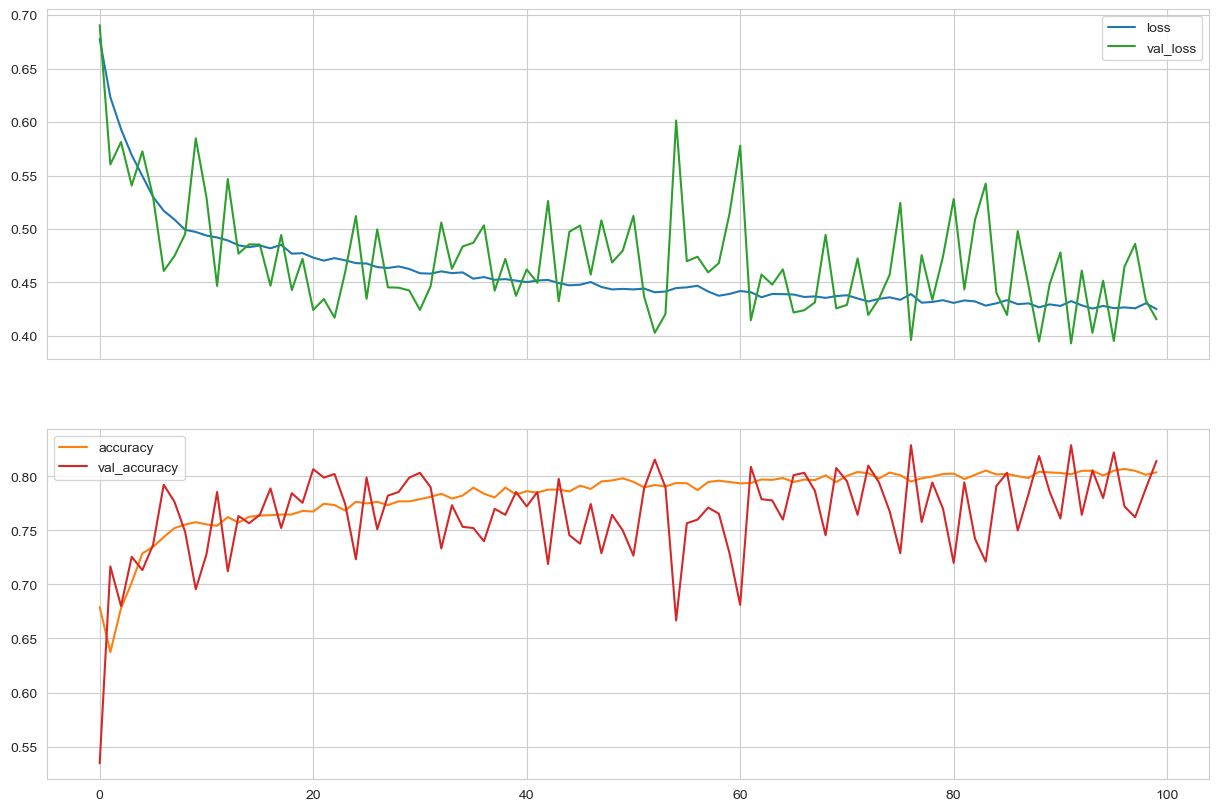

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [38]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4337691068649292
accuracy :  0.8159999847412109


In [39]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[677 119]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       796
           1       0.54      0.68      0.60       204

    accuracy                           0.82      1000
   macro avg       0.73      0.77      0.74      1000
weighted avg       0.84      0.82      0.82      1000



### Add Dropout Layer

In [40]:
from tensorflow.keras.layers import Dropout

In [41]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(11, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate=  0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 22)                242       
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense_13 (Dense)            (None, 11)                253       
                                                                 
 dropout_1 (Dropout)         (None, 11)                0         
                                                                 
 dense_14 (Dense)            (None, 5)                 60        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [42]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=50, 
          epochs=100,
          verbose=1,
          class_weight=sklearn_weights)

Epoch 1/100
162/162 [==============================] - 2s 3ms/step - loss: 0.6895 - accuracy: 0.5005 - val_loss: 0.6577 - val_accuracy: 0.6522
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.5264 - val_loss: 0.6119 - val_accuracy: 0.6722
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.5465 - val_loss: 0.6526 - val_accuracy: 0.6000
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.5648 - val_loss: 0.6270 - val_accuracy: 0.6422
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.5910 - val_loss: 0.6067 - val_accuracy: 0.6956
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.6462 - val_loss: 0.5832 - val_accuracy: 0.7156
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6923 - val_loss: 0.5533 - val_accuracy: 0.7467

Epoch 58/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7785 - val_loss: 0.4555 - val_accuracy: 0.7889
Epoch 59/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7740 - val_loss: 0.4523 - val_accuracy: 0.7856
Epoch 60/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7773 - val_loss: 0.4781 - val_accuracy: 0.7489
Epoch 61/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7680 - val_loss: 0.4642 - val_accuracy: 0.7856
Epoch 62/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7737 - val_loss: 0.4307 - val_accuracy: 0.8100
Epoch 63/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7779 - val_loss: 0.4602 - val_accuracy: 0.7967
Epoch 64/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7757 - val_loss: 0.4598 - val_accuracy:

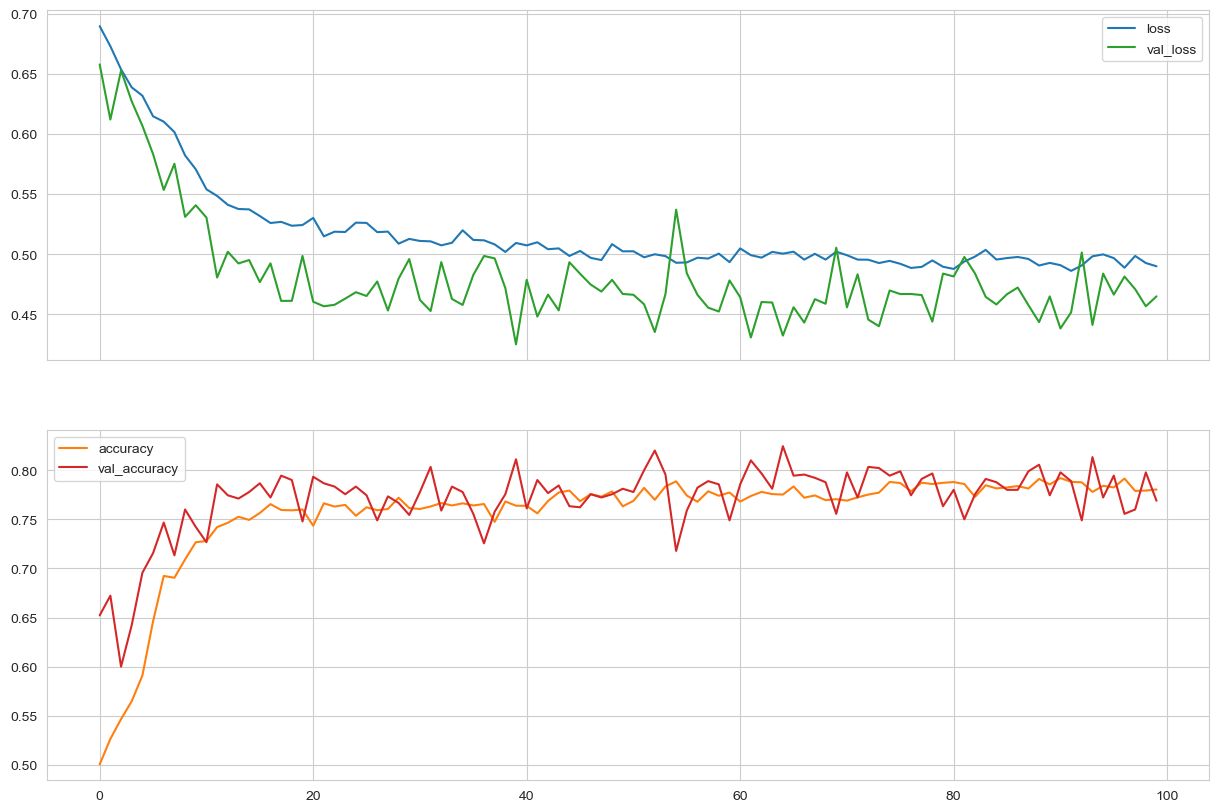

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [44]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.49883782863616943
accuracy :  0.7559999823570251


In [45]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[593 203]
 [ 41 163]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       796
           1       0.45      0.80      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.84      0.76      0.78      1000



### Add Early Stop

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [47]:
tf.keras.utils.set_random_seed(seed)

model_loss = Sequential()

model_loss.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model_loss.add(Dropout(0.2))

model_loss.add(Dense(11, activation = "relu"))
model_loss.add(Dropout(0.2))

model_loss.add(Dense(5, activation = "relu"))
model_loss.add(Dropout(0.2))

model_loss.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate=  0.002)
model_loss.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])
model_loss.summary()

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 22)                242       
                                                                 
 dropout_3 (Dropout)         (None, 22)                0         
                                                                 
 dense_17 (Dense)            (None, 11)                253       
                                                                 
 dropout_4 (Dropout)         (None, 11)                0         
                                                                 
 dense_18 (Dense)            (None, 5)                 60        
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [48]:
model_loss.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=50, 
          epochs=100,
          verbose=1,
          class_weight=sklearn_weights,
          callbacks=[early_stop])

Epoch 1/100
162/162 [==============================] - 2s 4ms/step - loss: 0.6895 - accuracy: 0.5005 - val_loss: 0.6577 - val_accuracy: 0.6522
Epoch 2/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5264 - val_loss: 0.6119 - val_accuracy: 0.6722
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.5465 - val_loss: 0.6526 - val_accuracy: 0.6000
Epoch 4/100
162/162 [==============================] - 1s 3ms/step - loss: 0.6386 - accuracy: 0.5648 - val_loss: 0.6270 - val_accuracy: 0.6422
Epoch 5/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.5910 - val_loss: 0.6067 - val_accuracy: 0.6956
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.6462 - val_loss: 0.5832 - val_accuracy: 0.7156
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.6923 - val_loss: 0.5533 - val_accuracy: 0.7467

32/32 [==============================] - 0s 2ms/step
[[644 152]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       796
           1       0.47      0.67      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.78      0.79      1000

32/32 [==============================] - 0s 2ms/step


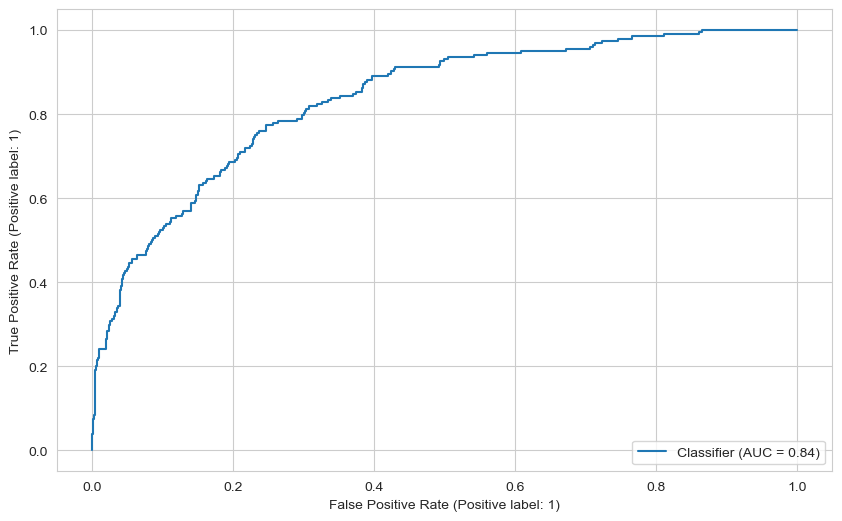

In [49]:
y_pred = model_loss.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred_proba = model_loss.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

#### Monitor the "val_recall" as metric

In [50]:
tf.keras.utils.set_random_seed(seed)

model_recall = Sequential()

model_recall.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model_recall.add(Dropout(0.2))

model_recall.add(Dense(11, activation = "relu"))
model_recall.add(Dropout(0.2))

model_recall.add(Dense(5, activation = "relu"))
model_recall.add(Dropout(0.2))

model_recall.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate=  0.002)
model_recall.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])
model_recall.summary()

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 22)                242       
                                                                 
 dropout_6 (Dropout)         (None, 22)                0         
                                                                 
 dense_21 (Dense)            (None, 11)                253       
                                                                 
 dropout_7 (Dropout)         (None, 11)                0         
                                                                 
 dense_22 (Dense)            (None, 5)                 60        
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [51]:
model_recall.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=50, 
          epochs=100,
          verbose=1,
          class_weight=sklearn_weights,
          callbacks=[early_stop])

Epoch 1/100
162/162 [==============================] - 1s 3ms/step - loss: 0.6895 - recall: 0.5982 - val_loss: 0.6577 - val_recall: 0.5410
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6728 - recall: 0.6764 - val_loss: 0.6119 - val_recall: 0.4699
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6536 - recall: 0.6861 - val_loss: 0.6526 - val_recall: 0.6831
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6386 - recall: 0.7121 - val_loss: 0.6270 - val_recall: 0.6284
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6317 - recall: 0.7000 - val_loss: 0.6067 - val_recall: 0.6339
Epoch 6/100
162/162 [==============================] - 1s 3ms/step - loss: 0.6145 - recall: 0.6564 - val_loss: 0.5832 - val_recall: 0.6448
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6101 - recall: 0.6388 - val_loss: 0.5533 - val_recall: 0.6230
Epoch 8/100
162/162 [======

32/32 [==============================] - 0s 1ms/step
[[538 258]
 [ 38 166]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       796
           1       0.39      0.81      0.53       204

    accuracy                           0.70      1000
   macro avg       0.66      0.74      0.66      1000
weighted avg       0.82      0.70      0.73      1000

32/32 [==============================] - 0s 2ms/step


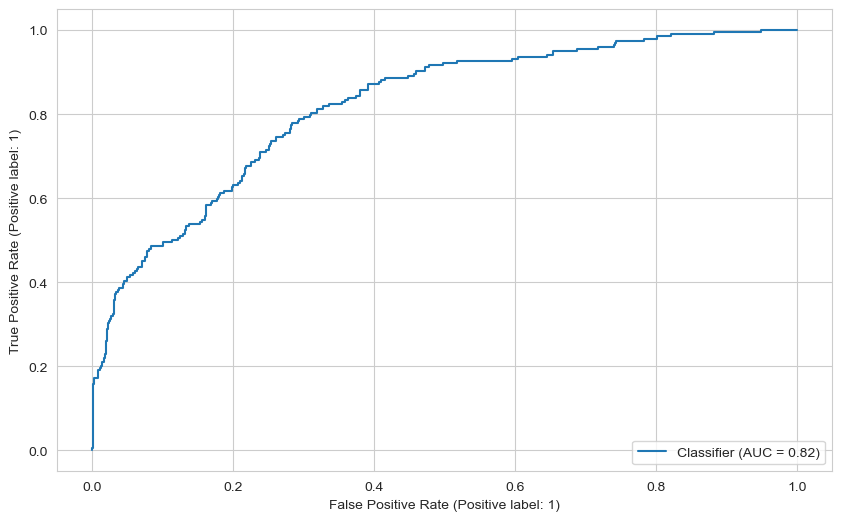

In [52]:
y_pred = model_recall.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred_proba = model_recall.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Optuna

In [124]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
import optuna

In [58]:
early_stop = EarlyStopping(
    monitor="val_Accuracy", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [59]:
trial_metric = "Accuracy"
batch_size = 50

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 10, 80) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 10, 80)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 10, 80)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[.1, .2, .3])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)

    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight=sklearn_weights,
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [60]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=10) 
display(study.best_params)

[I 2023-05-17 13:42:35,534] A new study created in memory with name: no-name-67a7c507-22f8-427b-b597-b988dbd1ac7a


Restoring model weights from the end of the best epoch: 124.
Epoch 139: early stopping


[I 2023-05-17 13:43:30,589] Trial 0 finished with value: 0.7009999752044678 and parameters: {'n_units1': 63, 'n_units2': 51, 'n_units3': 23, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0011278480816477232, 'regularizer1': 5.410030253984966e-05, 'regularizer2': 0.0001546198271494696, 'dropout': 0.3}. Best is trial 0 with value: 0.7009999752044678.


Restoring model weights from the end of the best epoch: 32.
Epoch 47: early stopping


[I 2023-05-17 13:43:46,754] Trial 1 finished with value: 0.7689999938011169 and parameters: {'n_units1': 24, 'n_units2': 31, 'n_units3': 55, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0006509645637822856, 'regularizer1': 0.00011271584386508452, 'regularizer2': 0.0002866785058133687, 'dropout': 0.2}. Best is trial 1 with value: 0.7689999938011169.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-05-17 13:44:00,531] Trial 2 finished with value: 0.75 and parameters: {'n_units1': 36, 'n_units2': 59, 'n_units3': 17, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0007455426263540344, 'regularizer1': 0.0008822030261081315, 'regularizer2': 0.00015946339736744926, 'dropout': 0.3}. Best is trial 1 with value: 0.7689999938011169.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-05-17 13:44:13,054] Trial 3 finished with value: 0.6660000085830688 and parameters: {'n_units1': 44, 'n_units2': 80, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.4007595615762494e-05, 'regularizer1': 1.78873578389239e-05, 'regularizer2': 9.682009133691528e-05, 'dropout': 0.3}. Best is trial 1 with value: 0.7689999938011169.


Restoring model weights from the end of the best epoch: 40.
Epoch 55: early stopping


[I 2023-05-17 13:44:35,274] Trial 4 finished with value: 0.7829999923706055 and parameters: {'n_units1': 54, 'n_units2': 41, 'n_units3': 41, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.00048179624144139573, 'regularizer1': 0.00018730167621083612, 'regularizer2': 0.0006811044554388331, 'dropout': 0.2}. Best is trial 4 with value: 0.7829999923706055.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-05-17 13:44:44,117] Trial 5 finished with value: 0.6439999938011169 and parameters: {'n_units1': 70, 'n_units2': 16, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 8.782628591751988e-05, 'regularizer1': 0.0005994073804652029, 'regularizer2': 0.0006824919897329457, 'dropout': 0.2}. Best is trial 4 with value: 0.7829999923706055.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-05-17 13:44:52,470] Trial 6 finished with value: 0.6449999809265137 and parameters: {'n_units1': 61, 'n_units2': 25, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0001098439701976883, 'regularizer1': 0.0006698575043745827, 'regularizer2': 0.00010934016589959397, 'dropout': 0.1}. Best is trial 4 with value: 0.7829999923706055.


Restoring model weights from the end of the best epoch: 28.
Epoch 43: early stopping


[I 2023-05-17 13:45:10,620] Trial 7 finished with value: 0.7889999747276306 and parameters: {'n_units1': 33, 'n_units2': 54, 'n_units3': 15, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.009654562812858496, 'regularizer1': 9.007161900543716e-05, 'regularizer2': 5.121032806870072e-05, 'dropout': 0.3}. Best is trial 7 with value: 0.7889999747276306.


Restoring model weights from the end of the best epoch: 31.
Epoch 46: early stopping


[I 2023-05-17 13:45:26,870] Trial 8 finished with value: 0.7900000214576721 and parameters: {'n_units1': 41, 'n_units2': 67, 'n_units3': 11, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0031100746586992857, 'regularizer1': 2.530024420408369e-05, 'regularizer2': 0.0005903480449425555, 'dropout': 0.2}. Best is trial 8 with value: 0.7900000214576721.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-05-17 13:45:39,579] Trial 9 finished with value: 0.6740000247955322 and parameters: {'n_units1': 79, 'n_units2': 33, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.0025322002379376e-05, 'regularizer1': 1.2536161462960627e-05, 'regularizer2': 3.2601850119580615e-05, 'dropout': 0.2}. Best is trial 8 with value: 0.7900000214576721.


{'n_units1': 41,
 'n_units2': 67,
 'n_units3': 11,
 'optimizer': keras.optimizers.adam.Adam,
 'learning_rate': 0.0031100746586992857,
 'regularizer1': 2.530024420408369e-05,
 'regularizer2': 0.0005903480449425555,
 'dropout': 0.2}

In [61]:
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"]
)

tf.keras.utils.set_random_seed(seed)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=50,
    epochs=100,
    callbacks=[early_stop],
    class_weight=sklearn_weights,
    verbose=1,
)

Epoch 1/100
162/162 [==============================] - 2s 4ms/step - loss: 0.6985 - Accuracy: 0.5698 - val_loss: 0.7246 - val_Accuracy: 0.5722
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6293 - Accuracy: 0.6953 - val_loss: 0.5763 - val_Accuracy: 0.7522
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5833 - Accuracy: 0.7341 - val_loss: 0.6387 - val_Accuracy: 0.6744
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5687 - Accuracy: 0.7379 - val_loss: 0.5339 - val_Accuracy: 0.7733
Epoch 5/100
162/162 [==============================] - 1s 3ms/step - loss: 0.5623 - Accuracy: 0.7401 - val_loss: 0.5275 - val_Accuracy: 0.7489
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5519 - Accuracy: 0.7526 - val_loss: 0.5079 - val_Accuracy: 0.7767
Epoch 7/100
162/162 [==============================] - 1s 3ms/step - loss: 0.5465 - Accuracy: 0.7580 - val_loss: 0.5222 - val_Accuracy: 0.7544

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

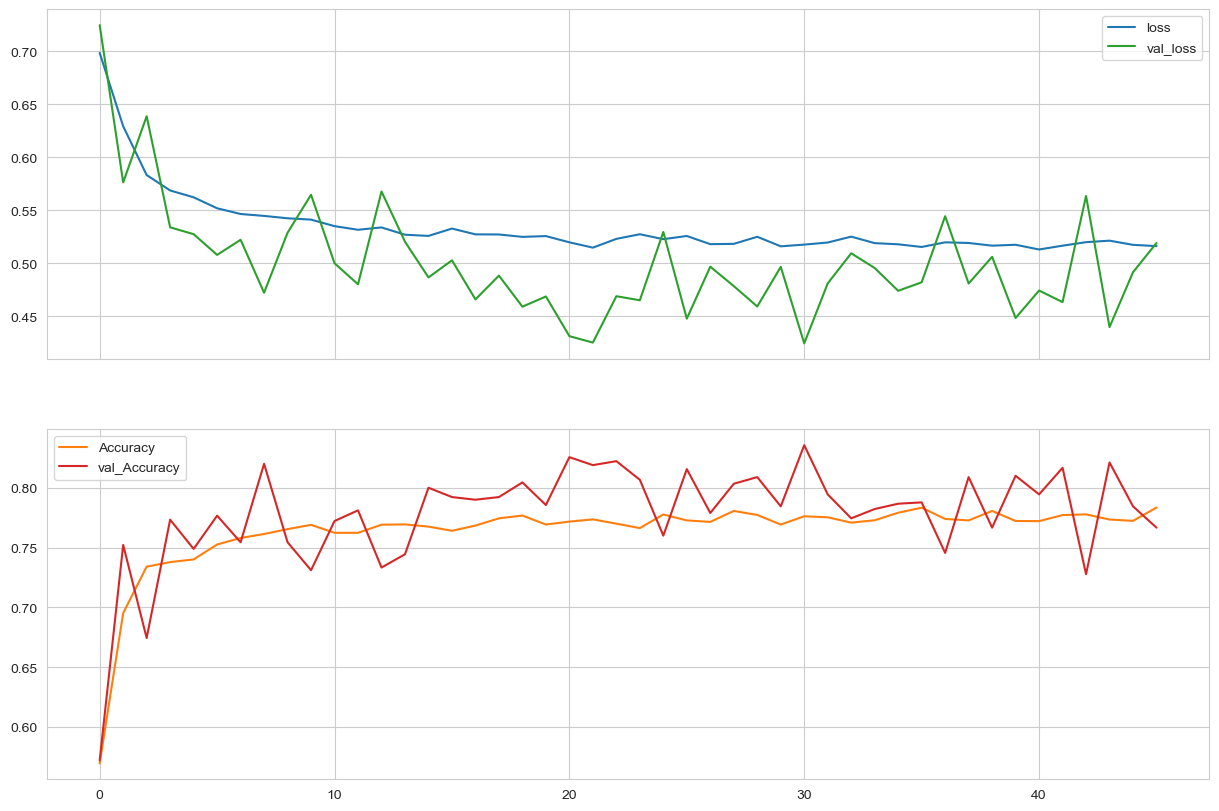

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [140]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[605 191]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       796
           1       0.44      0.74      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.76      0.78      1000



32/32 [==============================] - 0s 1ms/step


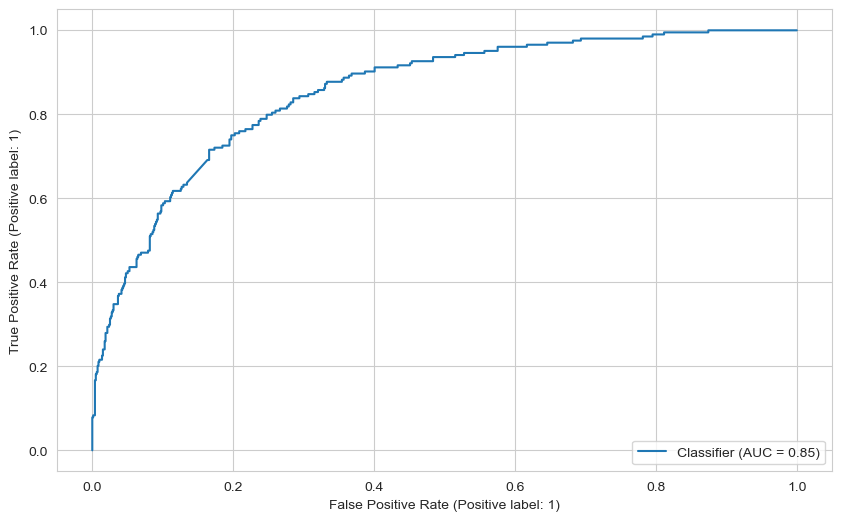

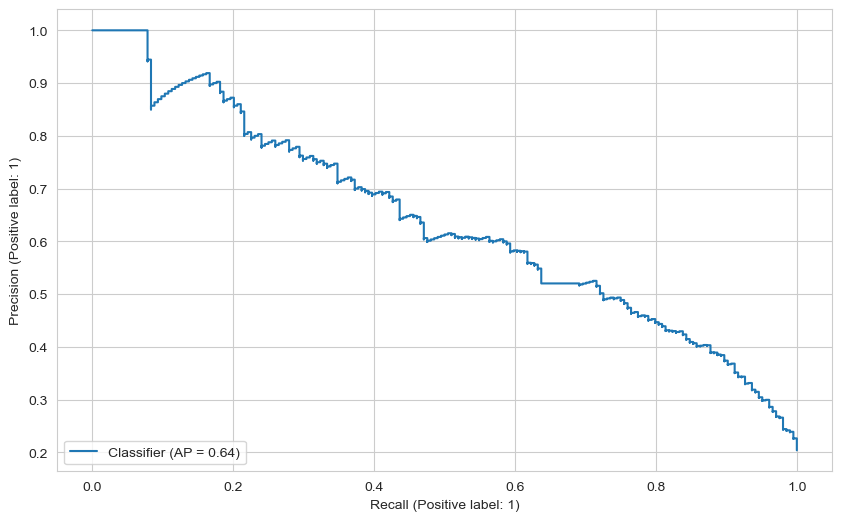

In [139]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba);
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba);

# Final Model and Model Deployment

In [162]:
tf.keras.utils.set_random_seed(seed)

final_model = Sequential()

final_model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
final_model.add(Dropout(0.2))

final_model.add(Dense(11, activation = "relu"))
final_model.add(Dropout(0.2))

final_model.add(Dense(5, activation = "relu"))
final_model.add(Dropout(0.2))

final_model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate=  0.004)
final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])
final_model.summary()


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 22)                242       
                                                                 
 dropout_99 (Dropout)        (None, 22)                0         
                                                                 
 dense_153 (Dense)           (None, 11)                253       
                                                                 
 dropout_100 (Dropout)       (None, 11)                0         
                                                                 
 dense_154 (Dense)           (None, 5)                 60        
                                                                 
 dropout_101 (Dropout)       (None, 5)                 0         
                                                                 
 dense_155 (Dense)           (None, 1)               

In [163]:
final_model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=50, 
          epochs=200,
          verbose=1,
          class_weight=sklearn_weights)

Epoch 1/200
162/162 [==============================] - 1s 3ms/step - loss: 0.6851 - accuracy: 0.5012 - val_loss: 0.6703 - val_accuracy: 0.5722
Epoch 2/200
162/162 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.5465 - val_loss: 0.6006 - val_accuracy: 0.6922
Epoch 3/200
162/162 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6116 - val_loss: 0.5907 - val_accuracy: 0.6911
Epoch 4/200
162/162 [==============================] - 1s 4ms/step - loss: 0.6077 - accuracy: 0.6494 - val_loss: 0.5679 - val_accuracy: 0.7156
Epoch 5/200
162/162 [==============================] - 1s 3ms/step - loss: 0.5768 - accuracy: 0.6883 - val_loss: 0.4997 - val_accuracy: 0.7600
Epoch 6/200
162/162 [==============================] - 1s 3ms/step - loss: 0.5494 - accuracy: 0.7127 - val_loss: 0.4953 - val_accuracy: 0.7322
Epoch 7/200
162/162 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7086 - val_loss: 0.4577 - val_accuracy: 0.8056

Epoch 58/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7749 - val_loss: 0.4676 - val_accuracy: 0.7822
Epoch 59/200
162/162 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7681 - val_loss: 0.4568 - val_accuracy: 0.7789
Epoch 60/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7768 - val_loss: 0.4862 - val_accuracy: 0.7678
Epoch 61/200
162/162 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7726 - val_loss: 0.4753 - val_accuracy: 0.8044
Epoch 62/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7777 - val_loss: 0.4173 - val_accuracy: 0.8289
Epoch 63/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7774 - val_loss: 0.4466 - val_accuracy: 0.8078
Epoch 64/200
162/162 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7822 - val_loss: 0.4534 - val_accuracy:

Epoch 115/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7857 - val_loss: 0.4906 - val_accuracy: 0.7733
Epoch 116/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7878 - val_loss: 0.4503 - val_accuracy: 0.8144
Epoch 117/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7799 - val_loss: 0.4805 - val_accuracy: 0.7667
Epoch 118/200
162/162 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7704 - val_loss: 0.4639 - val_accuracy: 0.8000
Epoch 119/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7827 - val_loss: 0.4566 - val_accuracy: 0.8022
Epoch 120/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7846 - val_loss: 0.4673 - val_accuracy: 0.7944
Epoch 121/200
162/162 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7867 - val_loss: 0.4703 - val_ac

162/162 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7881 - val_loss: 0.4295 - val_accuracy: 0.8122
Epoch 172/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7795 - val_loss: 0.4387 - val_accuracy: 0.8056
Epoch 173/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7804 - val_loss: 0.4831 - val_accuracy: 0.7689
Epoch 174/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7793 - val_loss: 0.4399 - val_accuracy: 0.8089
Epoch 175/200
162/162 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7836 - val_loss: 0.4467 - val_accuracy: 0.8011
Epoch 176/200
162/162 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7784 - val_loss: 0.4711 - val_accuracy: 0.7878
Epoch 177/200
162/162 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7796 - val_loss: 0.4395 - val_accuracy: 0.8033

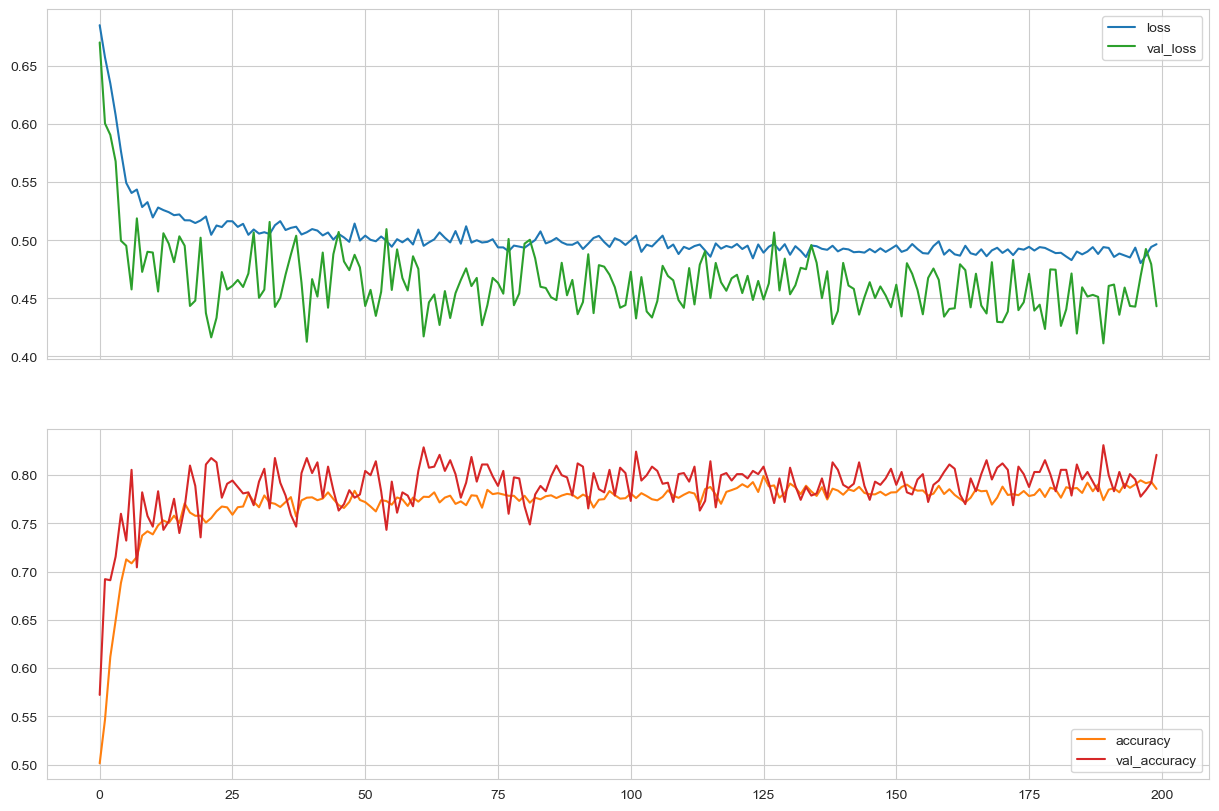

In [164]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [165]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[656 140]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       796
           1       0.52      0.73      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.81      0.82      1000



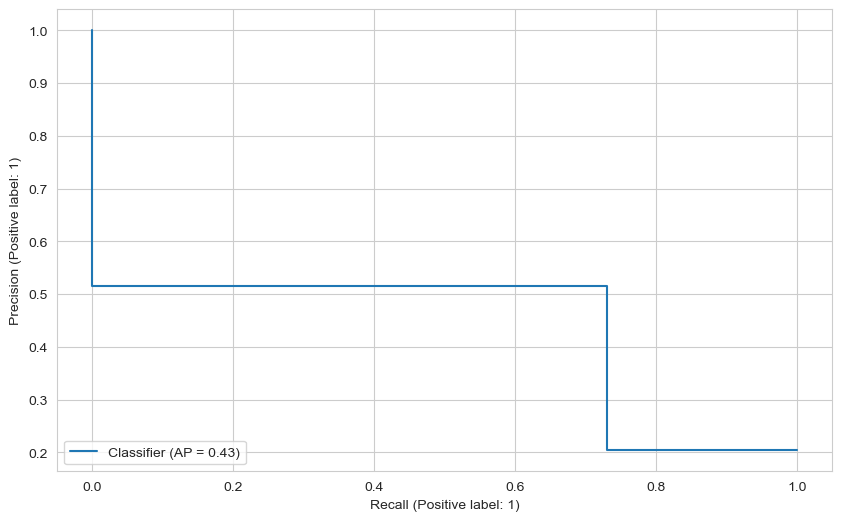

In [166]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred);

## Prediction

In [212]:
import pickle
from tensorflow.keras.models import load_model

In [210]:
pickle.dump(scaler, open("scaler_credit", 'wb'))
model.save('model_credit.h5')

In [213]:
model_credit = load_model('model_credit.h5')
scaler_credit = pickle.load(open("scaler_credit", "rb"))

In [214]:
sample = df.drop('Exited', axis = 1).iloc[0:10, :]
sample

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100
5,645,Spain,Male,44,8,113755.780,2,1,0,149756.710
6,822,France,Male,50,7,0.000,2,1,1,10062.800
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880
8,501,France,Male,44,4,142051.070,2,0,1,74940.500
9,684,France,Male,27,2,134603.880,1,1,1,71725.730


In [215]:
object_col = sample.select_dtypes('object').columns
encode = LabelEncoder()

for col in object_col:
    sample[col] = encode.fit_transform(sample[col])

In [217]:
sample_scale = scaler_credit.transform(sample)
sample_scale

array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489],
       [0.516     , 1.        , 0.        , 0.31081081, 0.1       ,
        0.33403148, 0.        , 0.        , 1.        , 0.56270874],
       [0.304     , 0.        , 0.        , 0.32432432, 0.8       ,
        0.63635718, 0.66666667, 1.        , 0.        , 0.56965435],
       [0.698     , 0.        , 0.        , 0.28378378, 0.1       ,
        0.        , 0.33333333, 0.        , 0.        , 0.46912005],
       [1.        , 1.        , 0.        , 0.33783784, 0.2       ,
        0.50024622, 0.        , 1.        , 1.        , 0.39540036],
       [0.59      , 1.        , 1.        , 0.35135135, 0.8       ,
        0.45339436, 0.33333333, 1.        , 0.        , 0.74879716],
       [0.944     , 0.        , 1.        , 0.43243243, 0.7       ,
        0.        , 0.33333333, 1.        , 1.        , 0.0502609 ],
       [0.052     , 0.5       , 0.       

In [218]:
pred = pd.DataFrame(model_credit.predict(sample_scale) > 0.5, columns=['pred']).astype("int32")
pred_prob = pd.DataFrame(model_credit.predict(sample_scale), columns=['prob'])

1/1 [==============================] - 0s 16ms/step


In [219]:
pd.concat([df.head(10), pred, pred_prob], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,pred,prob
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,0.586
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,0.361
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,0.997
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0,0.209
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,0.344
5,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1,0,0.428
6,822,France,Male,50,7,0.000,2,1,1,10062.800,0,0,0.128
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1,1,1.000
8,501,France,Male,44,4,142051.070,2,0,1,74940.500,0,0,0.287
9,684,France,Male,27,2,134603.880,1,1,1,71725.730,0,0,0.213


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___